# CSCI-UA 0473 - Introduction to Machine Learning
## Wednesday, April 11, 2018

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from scipy.sparse import diags
%matplotlib inline

from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import autograd
import autograd.numpy as numpy
import autograd.numpy.random as npr

from autograd import grad

import scipy.optimize

## 1. Data

In [2]:
newsgroups_train = datasets.fetch_20newsgroups(subset='train', 
                                               categories=['comp.sys.mac.hardware', 'rec.motorcycles', 'sci.med', 'soc.religion.christian'])

In [3]:
tfidf_vectorizer = TfidfVectorizer(min_df=30)
X = tfidf_vectorizer.fit_transform(newsgroups_train.data).toarray()
y = newsgroups_train.target

In [4]:
X = np.transpose(X)

def normalize(data):
    mean = np.mean(data, axis=1)[:,None]
    return data - mean

X = normalize(X)

(d, N) = X.shape
q = 2

print ("d",  d)
print ("N", N)
print ("q", q)

d 1771
N 2369
q 2


In [6]:
choose_which = "sgd"
# "compute_c", "svd", "sgd"

In [7]:
if choose_which == "svd":
    e_vec, S, V = linalg.svd(X)
    print ("X", X.shape)
    print ("e_vec", e_vec.shape)
    print ("S", S.shape) 
    print ("V", V.shape)
    
    #Sig = np.diag(S * S)
    #print (Sig.shape)
    #C = W * Sig * np.transpose(W)
    
elif choose_which == "compute_c":
    C = X @ np.transpose(X)
    e_val, e_vec = np.linalg.eig(C)
    e_vec = autograd.numpy.real( e_vec )
    
    print ("C", C.shape)
    print ("e_val", e_val.shape)
    print ("e_vec", e_vec.shape)
    
elif choose_which == "sgd":
    
    def print_diff(W):
        W2 = W @ np.transpose(W)
        dd = np.mean(np.identity(d) - W2)
        norm = np.mean(W2)
        print ("W     (Norm | Max | Min) : ({:.8f} | {:.8f} | {:.8f})".format(np.linalg.norm(W), np.max(W), np.min(W)))
        print ("WW^T (Diff | Norm) : ({:.8f}, {:.8f})".format(dd, norm) )
    
    def dist(W, X, d, q):
        W = W.reshape(d, q)
        dd = X - W @ autograd.numpy.transpose(W) @ X
        norm = autograd.numpy.linalg.norm( dd )
        return norm * norm
    
    #maxiter = 100
    e_vec = autograd.numpy.real( autograd.numpy.random.rand(d,q) )
    print ('start optimising...')
    print_diff(e_vec)
    trained_model = scipy.optimize.minimize(dist, e_vec, (X, d, q), method='CG', jac=grad(dist))
    #trained_model = scipy.optimize.minimize(dist, e_vec, (X, d, q), method='CG', jac=grad(dist), options={'maxiter':maxiter})
    print ('optimisation finished')
    e_vec = trained_model.x.reshape(d,q)
    print_diff(e_vec)
    

start optimising...
W     (Norm | Max | Min) : (34.45763211 | 0.99978718 | 0.00022799)
WW^T (Diff | Norm) : (-0.50409672, 0.50466137)
optimisation finished
W     (Norm | Max | Min) : (1.41421357 | 0.42349494 | -0.25806833)
WW^T (Diff | Norm) : (0.00053353, 0.00003113)


In [8]:
top_e_vec = np.transpose(e_vec[:,:q])

Z = np.transpose(np.matmul(top_e_vec, X))
print (Z.shape)
X_reduced = Z

(2369, 2)


## 2. PCA - Principal Components Analysis

In [9]:
print ('Original Shape: ', X.shape)
print ('Reduced Shape: ', X_reduced.shape)

Original Shape:  (1771, 2369)
Reduced Shape:  (2369, 2)


## 3. Visualizing the reduced data points

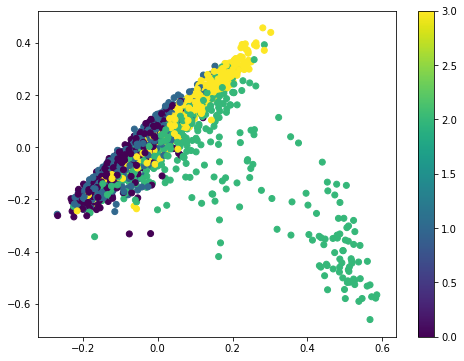

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c = y)
plt.colorbar()

## 4. Analysis

In [11]:
principal_components = top_e_vec

In [12]:
# What will be the shape of principal_components?

principal_components.shape

(2, 1771)

In [13]:
invocab = dict([(vv,kk) for kk, vv in tfidf_vectorizer.vocabulary_.items()])
insens_idx = np.argsort(principal_components[0])

print ('Top 10 most activated words (loadings)')
for jj in insens_idx[-10:]:
    print ('{} ({:0.6f})'.format(invocab[jj], principal_components[0,jj]))
           
    
print ('\n Top 10 least activated words (loadings)')
for jj in insens_idx[:10]:
    print ('{} ({:0.6f})'.format(invocab[jj], principal_components[0,jj]))

Top 10 most activated words (loadings)
it (0.144440)
to (0.164163)
cs (0.172769)
of (0.200419)
is (0.200852)
the (0.246211)
gordon (0.296939)
banks (0.302396)
geb (0.303420)
pitt (0.327736)

 Top 10 least activated words (loadings)
nntp (-0.071117)
host (-0.070099)
com (-0.069380)
posting (-0.068950)
mac (-0.063362)
ca (-0.054722)
apple (-0.051370)
bike (-0.051148)
thanks (-0.048095)
university (-0.040465)


In [14]:
invocab = dict([(vv,kk) for kk, vv in tfidf_vectorizer.vocabulary_.items()])
insens_idx = np.argsort(principal_components[1])

print ('Top 10 most activated words (loadings)')
for jj in insens_idx[-10:]:
    print ('{} ({:0.6f})'.format(invocab[jj], principal_components[1,jj]))
    
    
print ('\n Top 10 least activated words (loadings)')
for jj in insens_idx[:10]:
    print ('{} ({:0.6f})'.format(invocab[jj], principal_components[1,jj]))

Top 10 most activated words (loadings)
cs (0.152114)
that (0.167588)
to (0.185040)
is (0.210192)
of (0.223932)
gordon (0.263949)
banks (0.268891)
geb (0.269696)
pitt (0.290998)
the (0.299706)

 Top 10 least activated words (loadings)
nntp (-0.075911)
com (-0.075701)
host (-0.074763)
posting (-0.073378)
mac (-0.064723)
ca (-0.055375)
apple (-0.052147)
thanks (-0.050950)
bike (-0.049733)
university (-0.042897)
